参考https://www.codeleading.com/article/36904728547/

参考https://zhuanlan.zhihu.com/p/369931425

特征解释https://www.codeleading.com/article/94584690260/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

# EDA分析

In [42]:
# 2.1 读取文件
data_train = pd.read_csv('train.csv')
data_test_a = pd.read_csv('testA.csv')

In [3]:
# 2.2 总体了解
# 将前三行与后三行拼起来
data_train.head(3).append(data_train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [4]:
# 2.3 查看数据集中特征缺失值，唯一值等
# 多少列有缺失值
print(f"There are {data_train.isnull().any().sum()} columns in train dataset with missing values.")

There are 22 columns in train dataset with missing values.


In [6]:
# 查看缺失特征中缺失率大于50%的特征
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
        
fea_null_moreThanHalf  # 无

{}

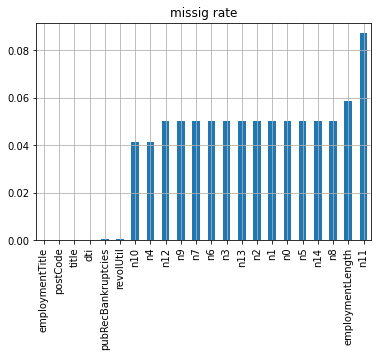

In [12]:
# 可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title('missing rate')
plt.grid()

In [13]:
# 查看训练集测试集中特征属性只有一值的特征
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]

print(f'There are {len(one_value_fea)} columns {one_value_fea} in train dataset with one unique value')
print(f'There are {len(one_value_fea_test)} columns {one_value_fea_test} in testA dataset with one unique value')

In [15]:
one_value_fea,one_value_fea_test

(['policyCode'], ['policyCode'])

In [17]:
# 2.4 查看特征的数值类型有哪些，对象类型有哪些
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [18]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [19]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [21]:
#划分数值型变量中的连续变量和分类变量
# 过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
	numerical_serial_fea = []
	numerical_noserial_fea = []
	for fea in feas:
		temp = data[fea].nunique()
		if temp <= 10:
			numerical_noserial_fea.append(fea)
			continue
		numerical_serial_fea.append(fea)
	return numerical_serial_fea,numerical_noserial_fea

numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [22]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [23]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [26]:
# 1) 数值类别型变量分析
data_train['term'].value_counts() #离散型变量

3    606902
5    193098
Name: term, dtype: int64

In [27]:
data_train['homeOwnership'].value_counts()#离散型变量

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

In [28]:
data_train['verificationStatus'].value_counts()#离散型变量

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [29]:
data_train['initialListStatus'].value_counts()#离散型变量

0    466438
1    333562
Name: initialListStatus, dtype: int64

In [30]:
data_train['applicationType'].value_counts()#离散型变量

0    784586
1     15414
Name: applicationType, dtype: int64

In [31]:
data_train['policyCode'].value_counts()#离散型变量，无用，全部一个值

1.0    800000
Name: policyCode, dtype: int64

In [32]:
data_train['n11'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [33]:
data_train['n12'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

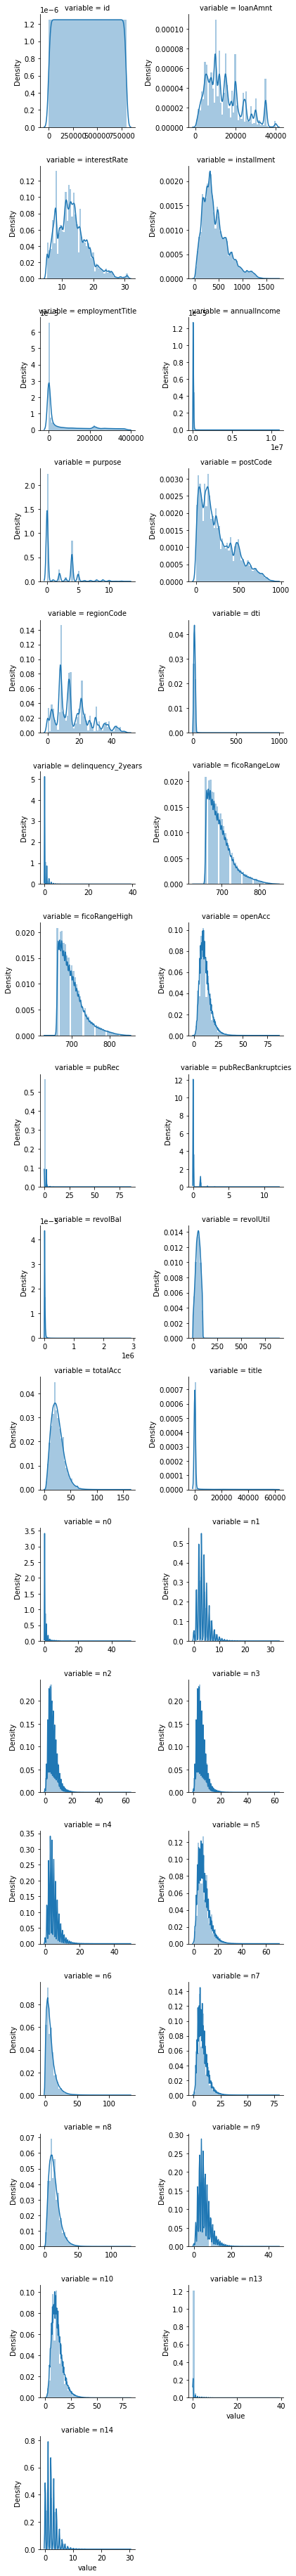

In [35]:
# 2) 数值连续型变量分析
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [36]:
# 3) 非数值类别型变量分析
data_train['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

In [37]:
data_train['subGrade'].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [38]:
data_train['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [39]:
data_train['issueDate'].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

In [40]:
data_train['earliesCreditLine'].value_counts()

Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: earliesCreditLine, Length: 720, dtype: int64

In [43]:
data_train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

# 特征分析及转换

In [74]:
data_train =pd.read_csv('train.csv')
data_test_a = pd.read_csv('testA.csv')

In [75]:
# 特征预处理
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
label = 'isDefault'
numerical_fea.remove(label)

In [76]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [77]:
# 缺失值填充
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

In [78]:
#按照平均数填充数值型特征
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_train[numerical_fea].median())
#按照众数填充类别型特征
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode())
data_test_a[category_fea] = data_test_a[category_fea].fillna(data_train[category_fea].mode())

In [79]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  0
regionCode                0
dti                       0
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies        0
revolBal                  0
revolUtil                 0
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                        0
n1                        0
n2                        0
n3                  

In [80]:
#查看数值特征
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [81]:
#查看类别特征
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [82]:
data_train['issueDate'].min(),data_train['issueDate'].max()

('2007-06-01', '2018-12-01')

In [83]:
# 时间格式处理
#转化成时间格式
for data in [data_train, data_test_a]:
	data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
	startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
	#构造时间特征
	data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [84]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()

1 year        52489
10+ years    262753
2 years       72358
3 years       64152
4 years       47985
5 years       50102
6 years       37254
7 years       35407
8 years       36192
9 years       30272
< 1 year      64237
NaN           46799
Name: employmentLength, dtype: int64

In [85]:
# 对象类型特征转换到数值
def employmentLength_to_int(s):
	if pd.isnull(s):
		return s
	else:
		return np.int8(s.split()[0])
    
for data in [data_train, data_test_a]:
	data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
	data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
	data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

data['employmentLength'].value_counts(dropna=False).sort_index()

0.0     15989
1.0     13182
2.0     18207
3.0     16011
4.0     11833
5.0     12543
6.0      9328
7.0      8823
8.0      8976
9.0      7594
10.0    65772
NaN     11742
Name: employmentLength, dtype: int64

In [86]:
# 对earliesCreditLine进行预处理
data_train['earliesCreditLine'].head(5)

0    Aug-2001
1    May-2002
2    May-2006
3    May-1999
4    Aug-1977
Name: earliesCreditLine, dtype: object

In [87]:
for data in [data_train, data_test_a]:
	data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [88]:
# 查看处理后的结果
data_train['earliesCreditLine'].head(5)

0    2001
1    2002
2    2006
3    1999
4    1977
Name: earliesCreditLine, dtype: int64

In [89]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [90]:
# 类别特征处理
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 'postCode', 'regionCode', 'applicationType', 'initialListStatus', 'title', 'policyCode']
for f in cate_features:
    print(f, '类型数：', data[f].nunique())

for data in [data_train, data_test_a]:
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

# 类型数在2之上，又不是高维稀疏的,且纯分类特征
for data in [data_train, data_test_a]:
    data = pd.get_dummies(data, columns=['subGrade', 'homeOwnership', 'verificationStatus','purpose', 'regionCode'], drop_first=True)

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 79282
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
postCode 类型数： 889
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 12058
policyCode 类型数： 1


In [91]:
# 异常值处理
# 检测异常的方法：均方差
def find_outliers_by_3segama(data,fea):
	data_std = np.std(data[fea])
	data_mean = np.mean(data[fea])
	outliers_cut_off = data_std * 3
	lower_rule = data_mean - outliers_cut_off
	upper_rule = data_mean + outliers_cut_off
	data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x <
	lower_rule else '正常值')
	return data

In [92]:
data_train = data_train.copy()
for fea in numerical_fea:
	data_train = find_outliers_by_3segama(data_train,fea)
	print(data_train[fea+'_outliers'].value_counts())
	print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
	print('*'*10)

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: term_outliers, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    799701
异常值       299
Name: homeOwnership_outliers, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      

In [105]:
# 特征交叉
for col in ['grade', 'subGrade']:
	temp_dict = data_train.groupby([col])['isDefault'].agg(['mean']).reset_index().rename(columns={'mean': col + '_target_mean'})
	temp_dict.index = temp_dict[col].values
	temp_dict = temp_dict[col + '_target_mean'].to_dict()
	data_train[col + '_target_mean'] = data_train[col].map(temp_dict)
	data_test_a[col + '_target_mean'] = data_test_a[col].map(temp_dict)

In [ ]:
'''
#包括离散型特征（类别特征）和连续性特征的一阶交叉
//定义离散型特征和连续型特征
col_cat = ['subGrade', 'grade', 'employmentLength', 'term', 'homeOwnership', 'postCode', 'regionCode','employmentTitle','title']
col_num = ['dti', 'revolBal','revolUtil', 'ficoRangeHigh', 'interestRate', 'loanAmnt', 'installment', 'annualIncome', 'n14',
             'n2', 'n6', 'n9', 'n5', 'n8']
             
# 定义离散型特征和连续型特征交叉特征统计函数
def cross_cat_num(df, num_col, cat_col):
    for f1 in tqdm(cat_col):
        g = df.groupby(f1, as_index=False)
        for f2 in tqdm(num_col):
            feat = g[f2].agg({
                '{}_{}_max'.format(f1, f2): 'max', '{}_{}_min'.format(f1, f2): 'min',
                '{}_{}_median'.format(f1, f2): 'median',
            })
            df = df.merge(feat, on=f1, how='left')
    return (df)
    
data = cross_cat_num(data, col_num, col_cat)  # 一阶交叉
print('一阶交叉特征处理后：', data.shape)


'''

In [ ]:
'''
# 类别特征之间的二阶交叉

def cross_qua_cat_num(df):
    for f_pair in tqdm([
        ['subGrade', 'regionCode'], ['grade', 'regionCode'], ['subGrade', 'postCode'], ['grade', 'postCode'], ['employmentTitle','title'],
        ['regionCode','title'], ['postCode','title'], ['homeOwnership','title'], ['homeOwnership','employmentTitle'],['homeOwnership','employmentLength'],
        ['regionCode', 'postCode']
    ]):
        ### 共现次数
        df['_'.join(f_pair) + '_count'] = df.groupby(f_pair)['id'].transform('count')
        ### n unique、熵
        df = df.merge(df.groupby(f_pair[0], as_index=False)[f_pair[1]].agg({
            '{}_{}_nunique'.format(f_pair[0], f_pair[1]): 'nunique',
            '{}_{}_ent'.format(f_pair[0], f_pair[1]): lambda x: entropy(x.value_counts() / x.shape[0])
        }), on=f_pair[0], how='left')
        df = df.merge(df.groupby(f_pair[1], as_index=False)[f_pair[0]].agg({
            '{}_{}_nunique'.format(f_pair[1], f_pair[0]): 'nunique',
            '{}_{}_ent'.format(f_pair[1], f_pair[0]): lambda x: entropy(x.value_counts() / x.shape[0])
        }), on=f_pair[1], how='left')
        ### 比例偏好
        df['{}_in_{}_prop'.format(f_pair[0], f_pair[1])] = df['_'.join(f_pair) + '_count'] / df[f_pair[1] + '_count']
        df['{}_in_{}_prop'.format(f_pair[1], f_pair[0])] = df['_'.join(f_pair) + '_count'] / df[f_pair[0] + '_count']
    return (df)


'''

In [ ]:
'''
# 针对数据中的n0-n14匿名特征，通过一套组合拳提取暴力特征

//求熵
def myEntro(x):
    """
        calculate shanno ent of x
    """
    x = np.array(x)
    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp
    #     print(x_value,p,logp)
    # print(ent)
    return ent

#求均方根
def myRms(records):
    records = list(records)
    """
    均方根值 反映的是有效值而不是平均值
    """
    return np.math.sqrt(sum([x ** 2 for x in records]) / len(records))

//求取众数
def myMode(x):
    return np.mean(pd.Series.mode(x))
    
//分别求取10，25，75，90分位值
def myQ25(x):
    return x.quantile(0.25)
    
def myQ75(x):
    return x.quantile(0.75)

def myQ10(x):
    return x.quantile(0.1)
    
def myQ90(x):
    return x.quantile(0.9)
    
//求值的范围
def myRange(x):
    return pd.Series.max(x) - pd.Series.min(x)

n_feat = ['n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', ]
nameList = ['min', 'max', 'sum', 'mean', 'median', 'skew', 'std', 'mode', 'range', 'Q25','Q75']
statList = ['min', 'max', 'sum', 'mean', 'median', 'skew', 'std', myMode, myRange, myQ25, myQ75]

for i in range(len(nameList)):
	data['n_feat_{}'.format(nameList[i])] = data[n_feat].agg(statList[i], axis=1)
print('n特征处理后：', data.shape)

'''

In [107]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'issueDateDT', 'id_outliers',
       'loanAmnt_outliers', 'term_outliers', 'interestRate_outliers',
       'installment_outliers', 'employmentTitle_outliers',
       'homeOwnership_outliers', 'annualIncome_outliers',
       'verificationStatus_outliers', 'purpose_outliers', 'postCode_outliers',
       'regionCode_outliers', 'dti_outliers', 'delinquency_2years_outliers',
       '

In [108]:
# 其他衍生变量 mean 和 std
for df in [data_train, data_test_a]:
	for item in ['n0','n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n12','n13','n14']:
		df['grade_to_mean_' + item] = df['grade'] / df.groupby([item])['grade'].transform('mean')
		df['grade_to_std_' + item] = df['grade'] / df.groupby([item])['grade'].transform('std')

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
warnings.filterwarnings('ignore')

In [111]:
# 特征编码
# 高维类别特征需要进行转换
for col in tqdm(['employmentTitle', 'postCode', 'title','subGrade']):
	le = LabelEncoder()
	le.fit(list(data_train[col].astype(str).values) + 	list(data_test_a[col].astype(str).values))
	data_train[col] = le.transform(list(data_train[col].astype(str).values))
	data_test_a[col] = le.transform(list(data_test_a[col].astype(str).values))
	print('Label Encoding 完成')

 25%|█████████████████████                                                               | 1/4 [00:02<00:08,  2.97s/it]

Label Encoding 完成


 50%|██████████████████████████████████████████                                          | 2/4 [00:04<00:04,  2.20s/it]

Label Encoding 完成


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:06<00:01,  1.97s/it]

Label Encoding 完成


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.78s/it]

Label Encoding 完成


In [116]:
data_train.shape

(800000, 119)

In [117]:
data_train.columns.to_list()

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'grade',
 'subGrade',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'issueDate',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'earliesCreditLine',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'issueDateDT',
 'id_outliers',
 'loanAmnt_outliers',
 'term_outliers',
 'interestRate_outliers',
 'installment_outliers',
 'employmentTitle_outliers',
 'homeOwnership_outliers',
 'annualIncome_outliers',
 'verificationStatus_outliers',
 'purpose_outliers',
 'postCode_outliers',
 'regionCode_outliers',
 'dti_outliers',
 'delinquency_2years_outliers',
 'ficoRangeLow_outliers',
 'ficoRangeHigh_ou

# 特征选择-- 测试

In [120]:
train = data_train[['term','interestRate','grade','subGrade','delinquency_2years']]
target_train = data_train['isDefault']

In [122]:
# 特征选择
from sklearn.feature_selection import VarianceThreshold
#其中参数threshold为方差的阈值
VarianceThreshold(threshold=3).fit_transform(train,target_train)

array([[19.52, 21.  ],
       [18.49, 16.  ],
       [16.99, 17.  ],
       ...,
       [13.33, 12.  ],
       [ 6.92,  3.  ],
       [11.06,  7.  ]])

In [123]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，
#输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数
SelectKBest(k=5).fit_transform(train,target_train)

array([[ 5.  , 19.52,  5.  , 21.  ,  0.  ],
       [ 5.  , 18.49,  4.  , 16.  ,  0.  ],
       [ 5.  , 16.99,  4.  , 17.  ,  0.  ],
       ...,
       [ 3.  , 13.33,  3.  , 12.  ,  1.  ],
       [ 3.  ,  6.92,  1.  ,  3.  ,  0.  ],
       [ 3.  , 11.06,  2.  ,  7.  ,  0.  ]])

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#参数k为选择的特征个数
SelectKBest(chi2, k=5).fit_transform(train,target_train)

array([[ 5.  , 19.52,  5.  , 21.  ,  0.  ],
       [ 5.  , 18.49,  4.  , 16.  ,  0.  ],
       [ 5.  , 16.99,  4.  , 17.  ,  0.  ],
       ...,
       [ 3.  , 13.33,  3.  , 12.  ,  1.  ],
       [ 3.  ,  6.92,  1.  ,  3.  ,  0.  ],
       [ 3.  , 11.06,  2.  ,  7.  ,  0.  ]])

In [149]:
from sklearn.feature_selection import SelectKBest
'''
from minepy import MINE
#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，
#返回一个二元组，二元组的第2项设置成固定的P值0.5
def mic(x, y):
	m = MINE()
	m.compute_score(x, y)
	return (m.mic(), 0.5)
#参数k为选择的特征个数
SelectKBest(lambda X, Y: array(map(lambda x:mic(x, Y), X.T)).T, k=2).fit_transform(train,target_train)
'''


'\nfrom minepy import MINE\n#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，\n#返回一个二元组，二元组的第2项设置成固定的P值0.5\ndef mic(x, y):\n\tm = MINE()\n\tm.compute_score(x, y)\n\treturn (m.mic(), 0.5)\n#参数k为选择的特征个数\nSelectKBest(lambda X, Y: array(map(lambda x:mic(x, Y), X.T)).T, k=2).fit_transform(train,target_train)\n'

In [150]:
# Wrapper
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
RFE(estimator=LogisticRegression(),
n_features_to_select=2).fit_transform(train,target_train)

array([[ 5., 21.],
       [ 5., 16.],
       [ 5., 17.],
       ...,
       [ 3., 12.],
       [ 3.,  3.],
       [ 3.,  7.]])

In [151]:
# Embedded
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
#带L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(LogisticRegression(penalty="l2", C=0.1)).fit_transform(train,target_train)

array([[ 5., 21.],
       [ 5., 16.],
       [ 5., 17.],
       ...,
       [ 3., 12.],
       [ 3.,  3.],
       [ 3.,  7.]])

In [152]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
#GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(train,target_train)

array([[21.],
       [16.],
       [17.],
       ...,
       [12.],
       [ 3.],
       [ 7.]])

# 继续特征工程

In [153]:
data_train.shape

(800000, 119)

## 数据分桶

- 目的：从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定

- 分桶对象：将连续变量离散化；将多状态的离散变量合并成少状态

- 分桶原因：数据的特征内的值跨度可能比较大，对有监督和无监督中如k-均值聚类它使用欧氏距离作为相似度函数来测量数据点之间的相似度。都会造成大吃小的影响，其中一种解决方法是对计数值进行区间量化即数据分桶也叫做数据分箱，然后使用量化后的结果。

- 分桶优点：易于处理缺失：当数据源可能存在缺失值，此时可以把null单独作为一个分箱。；易于处理异常：当数据中存在离群点时，可以把其通过分箱离散化处理，从而提高变量的鲁棒性（抗干扰能力）。业务解释性：我们习惯于线性判断变量的作用，当x越来越大，y就越来越大。但实际x与y之间经常存在着非线性关系，此时可经过WOE变换。

- 分桶原则：最小分箱占比不低于5%；箱内不能全部是好客户；连续箱单调

### 固定宽度分箱和分位数分箱

In [156]:
# 固定宽度分箱：
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/1000
for data in [data_train, data_test_a]:
    # 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/1000
    data['loanAmnt_bin1'] = np.floor_divide(data['loanAmnt'], 1000)
    
    ## 通过对数函数映射到指数宽度分箱
    data['loanAmnt_bin2'] = np.floor(np.log10(data['loanAmnt']))
    
    # 分位数分箱：
    data['loanAmnt_bin3'] = pd.qcut(data['loanAmnt'], 10, labels=False)



In [157]:
# 删除不需要的数据
for data in [data_train, data_test_a]:
    data.drop(['issueDate','id'], axis=1,inplace=True)


In [158]:
"纵向用缺失值上面的值替换缺失值"
data_train = data_train.fillna(axis=0,method='ffill')


In [162]:
x_train = data_train.drop(['isDefault'], axis=1)
#计算协方差
data_corr = x_train.corrwith(data_train.isDefault) #计算相关性
result = pd.DataFrame(columns=['features', 'corr'])
result['features'] = data_corr.index
result['corr'] = data_corr.values

result.sort_values(by=['corr'],ascending=False)

,features,corr
46,subGrade_target_mean,0.268400
5,subGrade,0.267724
53,grade_to_mean_n4,0.262484
45,grade_target_mean,0.262301
72,grade_to_std_n13,0.261863
...,...,...
56,grade_to_std_n5,NaN
58,grade_to_std_n6,NaN
62,grade_to_std_n8,NaN
66,grade_to_std_n10,NaN


# 模型训练

In [172]:
features = [f for f in data_train.columns if f not in ['id','issueDate','isDefault'] and '_outliers' not in f]

x_train = data_train[features]
x_test = data_test_a[features]
y_train = data_train['isDefault']

In [173]:
def cv_model(clf, train_x, train_y, test_x, clf_name):
    folds = 5
    seed = 2020
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

    train = np.zeros(train_x.shape[0])
    test = np.zeros(test_x.shape[0])

    cv_scores = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]

        if clf_name == "lgb":
            train_matrix = clf.Dataset(trn_x, label=trn_y)
            valid_matrix = clf.Dataset(val_x, label=val_y)

            params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'min_child_weight': 5,
                'num_leaves': 2 ** 5,
                'lambda_l2': 10,
                'feature_fraction': 0.8,
                'bagging_fraction': 0.8,
                'bagging_freq': 4,
                'learning_rate': 0.1,
                'seed': 2020,
                'nthread': 28,
                'n_jobs':24,
                'silent': True,
                'verbose': -1,
            }

            model = clf.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix], verbose_eval=200,early_stopping_rounds=200)
            val_pred = model.predict(val_x, num_iteration=model.best_iteration)
            test_pred = model.predict(test_x, num_iteration=model.best_iteration)
            
            # print(list(sorted(zip(features, model.feature_importance("gain")), key=lambda x: x[1], reverse=True))[:20])
                
        if clf_name == "xgb":
            train_matrix = clf.DMatrix(trn_x , label=trn_y)
            valid_matrix = clf.DMatrix(val_x , label=val_y)
            
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'eval_metric': 'auc',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.04,
                      'tree_method': 'exact',
                      'seed': 2020,
                      'nthread': 36,
                      "silent": True,
                      }
            
            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]
            
            model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=200, early_stopping_rounds=200)
            val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            test_pred = model.predict(test_x , ntree_limit=model.best_ntree_limit)
                 
        if clf_name == "cat":
            params = {'learning_rate': 0.05, 'depth': 5, 'l2_leaf_reg': 10, 'bootstrap_type': 'Bernoulli',
                      'od_type': 'Iter', 'od_wait': 50, 'random_seed': 11, 'allow_writing_files': False}
            
            model = clf(iterations=20000, **params)
            model.fit(trn_x, trn_y, eval_set=(val_x, val_y),
                      cat_features=[], use_best_model=True, verbose=500)
            
            val_pred  = model.predict(val_x)
            test_pred = model.predict(test_x)
            
        train[valid_index] = val_pred
        test = test_pred / kf.n_splits
        cv_scores.append(roc_auc_score(val_y, val_pred))
        
        print(cv_scores)
        
    print("%s_scotrainre_list:" % clf_name, cv_scores)
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))
    print("%s_score_std:" % clf_name, np.std(cv_scores))
    return train, test

In [174]:
def lgb_model(x_train, y_train, x_test):
    lgb_train, lgb_test = cv_model(lgb, x_train, y_train, x_test, "lgb")
    return lgb_train, lgb_test

def xgb_model(x_train, y_train, x_test):
    xgb_train, xgb_test = cv_model(xgb, x_train, y_train, x_test, "xgb")
    return xgb_train, xgb_test

def cat_model(x_train, y_train, x_test):
    cat_train, cat_test = cv_model(CatBoostRegressor, x_train, y_train, x_test, "cat")

lgb_train, lgb_test = lgb_model(x_train, y_train, x_test)

************************************ 1 ************************************
[LightGBM] [Warning] num_threads is set with nthread=28, will be overridden by n_jobs=24. Current value: num_threads=24
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.747379	valid_1's auc: 0.735377
[400]	training's auc: 0.760172	valid_1's auc: 0.736253
[600]	training's auc: 0.771084	valid_1's auc: 0.736143
Early stopping, best iteration is:
[451]	training's auc: 0.76318	valid_1's auc: 0.736358
[0.7363579235141751]
************************************ 2 ************************************
[LightGBM] [Warning] num_threads is set with nthread=28, will be overridden by n_jobs=24. Current value: num_threads=24
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.748341	valid_1's auc: 0.731198
[400]	training's auc: 0.76105	valid_1's auc: 0.732086
[600]	

In [177]:
# 添加一列新的特征用于区分
x_train['sample'] = 'train'
x_test['sample'] = 'test'
# 数据集合成并保存
data_sum = x_train.append(x_test)

In [178]:
data_sum.to_csv("data_for_model.csv",index=False)

# 建模与调参

In [180]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [182]:
data = pd.read_csv('data_for_model.csv')

In [183]:
data = reduce_mem_usage(data)

Memory usage of dataframe is 632000128.00 MB
Memory usage after optimization is: 203000252.00 MB
Decreased by 67.9%


## 建模之前的预操作

In [184]:
from sklearn.model_selection import KFold
# 分离数据集，方便进行交叉验证
X_train = data.loc[data['sample']=='train', :].drop([ 'sample'], axis=1)
X_test = data.loc[data['sample']=='test', :].drop(['sample'], axis=1)


# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)


### 使用Lightgbm进行建模

In [186]:
#"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
}

#"""使用训练集数据进行模型训练"""
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[412]	valid_0's auc: 0.734907


未调参前lightgbm单模型在验证集上的AUC：0.734906858464649


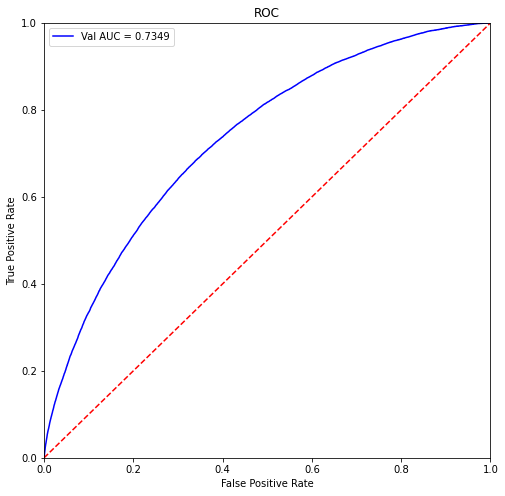

In [187]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

"""预测并计算roc的相关指标"""
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [189]:
# 更进一步的，使用5折交叉验证进行模型性能评估

import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'auc',
        
                'min_child_weight': 1e-3,
                'num_leaves': 31,
                'max_depth': -1,
                'reg_lambda': 0,
                'reg_alpha': 0,
                'feature_fraction': 1,
                'bagging_fraction': 1,
                'bagging_freq': 0,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[293]	valid_0's auc: 0.734899
[0.7348988840123012]
************************************ 2 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[547]	valid_0's auc: 0.731212
[0.7348988840123012, 0.7312115409283895]
************************************ 3 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[519]	valid_0's auc: 0.734706
[0.7348988840123012, 0.7312115409283895, 0.7347056811356362]
************************************ 4 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Trai

### 调参——贪心调参

- ①：max_depth、num_leaves
- ②：min_data_in_leaf、min_child_weight
- ③：bagging_fraction、 feature_fraction、bagging_freq
- ④：reg_lambda、reg_alpha
- ⑤：min_split_gain

In [202]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
'''
objective = ['regression','reg:logistic', 'binary:logitraw']

# 调objective
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_obj[obj] = score

# num_leaves
num_leaves = [68,74,80,86,92]
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')#.mean()
    best_leaves[leaves] = score

# max_depth
max_depth = [6,7,8]
best_depth = dict()
"""
可依次将模型的参数通过上面的方式进行调整优化，并且通过可视化观察在每一个最优参数下模型的得分情况
"""
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_depth[depth] = score
    
'''



'\nobjective = [\'regression\',\'reg:logistic\', \'binary:logitraw\']\n\n# 调objective\nbest_obj = dict()\nfor obj in objective:\n    model = LGBMRegressor(objective=obj)\n    """预测并计算roc的相关指标"""\n    score = cross_val_score(model, X_train, y_train, cv=5, scoring=\'roc_auc\').mean()\n    best_obj[obj] = score\n\n# num_leaves\nnum_leaves = [68,74,80,86,92]\nbest_leaves = dict()\nfor leaves in num_leaves:\n    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)\n    """预测并计算roc的相关指标"""\n    score = cross_val_score(model, X_train, y_train, cv=5, scoring=\'roc_auc\')#.mean()\n    best_leaves[leaves] = score\n\n# max_depth\nmax_depth = [6,7,8]\nbest_depth = dict()\n"""\n可依次将模型的参数通过上面的方式进行调整优化，并且通过可视化观察在每一个最优参数下模型的得分情况\n"""\nfor depth in max_depth:\n    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],\n                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],\n                          max_depth

### 贝叶斯调参

In [192]:
from sklearn.model_selection import cross_val_score

"""定义优化函数"""
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf, 
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
    # 建立模型
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', bjective='binary', metric='auc',
                                   learning_rate=0.1, n_estimators=5000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth), 
                                   bagging_fraction=round(bagging_fraction, 2), feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )

    val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=5, scoring='roc_auc').mean()

    return val
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    {
        'num_leaves':(10, 200),
        'max_depth':(3, 20),
        'bagging_fraction':(0.5, 1.0),
        'feature_fraction':(0.5, 1.0),
        'bagging_freq':(0, 100),
        'min_data_in_leaf':(10,100),
        'min_child_weight':(0, 10),
        'min_split_gain':(0.0, 1.0),
        'reg_alpha':(0.0, 10),
        'reg_lambda':(0.0, 10),
    }
)

In [193]:
# 开始优化
bayes_lgb.maximize(n_iter=10)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.91, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.91
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] bagging_fraction is set=0.69, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69
[LightGBM] [Warning] bagging_freq is set=35, subsample_freq=0 will be ignored. Current value: bagging_freq=35
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.91, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.91
[LightG

|  3        |  0.7178   |  0.6563   |  15.28    |  0.7682   |  14.33    |  6.945    |  71.23    |  0.7956   |  94.22    |  0.9644   |  1.163    |
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] bagging_fraction is set=0.74, subsample=1.0 will be ignored. Current value: bagging_fraction=0.74
[LightGBM] [Warning] bagging_freq is set=59, subsample_freq=0 will be ignored. Current value: bagging_freq=59
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] bagging_fr

|  6        |  0.7325   |  0.854    |  10.7     |  0.7304   |  5.739    |  3.916    |  60.9     |  0.6166   |  21.64    |  3.995    |  8.734    |
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.51, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.51
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.51, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.51
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] bagging_fr

|  9        |  0.727    |  0.6686   |  17.92    |  0.7859   |  6.938    |  2.677    |  52.05    |  0.7076   |  19.6     |  4.259    |  7.031    |
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_fraction is set=0.97, subsample=1.0 will be ignored. Current value: bagging_fraction=0.97
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_fracti

|  12       |  0.7335   |  0.978    |  25.85    |  1.0      |  3.0      |  10.0     |  85.05    |  1.0      |  35.41    |  0.1671   |  0.0      |
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=29, subsample_freq=0 will be ignored. Current value: bagging_freq=29
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_fraction

|  15       |  0.7344   |  0.7722   |  33.82    |  0.5184   |  4.326    |  9.521    |  75.17    |  0.8957   |  36.36    |  2.094    |  4.153    |


In [194]:
# 显示优化结果
bayes_lgb.max

{'target': 0.7346635692660806,
 'params': {'bagging_fraction': 0.9417242771750516,
  'bagging_freq': 18.196951181672606,
  'feature_fraction': 0.8566373988024287,
  'max_depth': 5.875367919538219,
  'min_child_weight': 8.754939026684232,
  'min_data_in_leaf': 84.26427955245637,
  'min_split_gain': 0.6601995334157713,
  'num_leaves': 38.4707126876427,
  'reg_alpha': 1.192571146609609,
  'reg_lambda': 9.10333300087211}}

In [ ]:
'params': {'bagging_fraction': 0.9417242771750516,
  'bagging_freq': 18.196951181672606,
  'feature_fraction': 0.8566373988024287,
  'max_depth': 5.875367919538219,
  'min_child_weight': 8.754939026684232,
  'min_data_in_leaf': 84.26427955245637,
  'min_split_gain': 0.6601995334157713,
  'num_leaves': 38.4707126876427,
  'reg_alpha': 1.192571146609609,
  'reg_lambda': 9.10333300087211}

In [198]:
"""调整一个较小的学习率，并通过cv函数确定当前最优的迭代次数"""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 38,
                    'max_depth': 6,
                    'min_data_in_leaf': 84,
                    'min_child_weight':8.7,
                    'bagging_fraction': 0.94,
                    'feature_fraction': 0.86,
                    'bagging_freq': 18,
                    'reg_lambda': 9,
                    'reg_alpha': 1.2,
                    'min_split_gain': 0.66,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
                    'verbose': -1,
}

cv_result_lgb = lgb.cv(
    train_set=train_matrix,
    early_stopping_rounds=1000, 
    num_boost_round=15000,
    nfold=5,
    stratified=True,
    shuffle=True,
    params=base_params_lgb,
    metrics='auc',
    seed=0
)

print('迭代次数{}'.format(len(cv_result_lgb['auc-mean'])))
print('最终模型的AUC为{}'.format(max(cv_result_lgb['auc-mean'])))

迭代次数7836
最终模型的AUC为0.7360206599567383


In [201]:
# 模型参数已经确定，建立最终模型并对验证集进行验证

import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
      
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)
    '''
        params = {
                  'boosting_type': 'gbdt',
                  'objective': 'binary',
                  'metric': 'auc',
                  'learning_rate': 0.01,
                  'num_leaves': 14,
                  'max_depth': 19,
                  'min_data_in_leaf': 37,
                  'min_child_weight':1.6,
                  'bagging_fraction': 0.98,
                  'feature_fraction': 0.69,
                  'bagging_freq': 96,
                  'reg_lambda': 9,
                  'reg_alpha': 7,
                  'min_split_gain': 0.4,
                  'nthread': 8,
                  'seed': 2020,
                  'silent': True,
      }
      '''
    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'learning_rate': 0.01,
                'num_leaves': 38,
                'max_depth': 6,
                'min_data_in_leaf': 84,
                'min_child_weight':8.7,
                'bagging_fraction': 0.94,
                'feature_fraction': 0.86,
                'bagging_freq': 18,
                'reg_lambda': 9,
                'reg_alpha': 1.2,
                'min_split_gain': 0.66,
                'nthread': 8,
                'seed': 2020,
                'silent': True,
                'verbose': -1,
      }

      
    model = lgb.train(params, train_set=train_matrix, num_boost_round=7836, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
      
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)
  
print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.732659
[2000]	valid_0's auc: 0.73556
[3000]	valid_0's auc: 0.736462
[4000]	valid_0's auc: 0.736988
[5000]	valid_0's auc: 0.737339
Early stopping, best iteration is:
[5714]	valid_0's auc: 0.737491
[0.7374914714479888]
************************************ 2 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.728689
[2000]	valid_0's auc: 0.731833
[3000]	valid_0's auc: 0.732961
[4000]	valid_0's auc: 0.733614
[5000]	valid_0's auc: 0.733928
Early stopping, best iteration is:
[5526]	valid_0's auc: 0.734037
[0.7374914714479888, 0.7340370406009501]
************************************ 3 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 

In [ ]:
'''
通过5折交叉验证可以发现，模型迭代次数在13000次的时候会停止，
那么我们在建立新模型时直接设置最大迭代次数，并使用验证集进行模型预测
'''

[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.73014
[2000]	valid_0's auc: 0.733512
[3000]	valid_0's auc: 0.734812
[4000]	valid_0's auc: 0.735585
[5000]	valid_0's auc: 0.735896
[6000]	valid_0's auc: 0.736013
Early stopping, best iteration is:
[6703]	valid_0's auc: 0.736164
调参后lightgbm单模型在验证集上的AUC：0.736164243746845


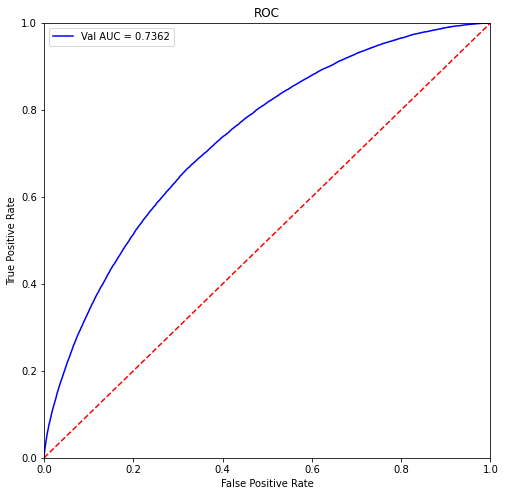

In [203]:
base_params_lgb = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'learning_rate': 0.01,
                'num_leaves': 38,
                'max_depth': 6,
                'min_data_in_leaf': 84,
                'min_child_weight':8.7,
                'bagging_fraction': 0.94,
                'feature_fraction': 0.86,
                'bagging_freq': 18,
                'reg_lambda': 9,
                'reg_alpha': 1.2,
                'min_split_gain': 0.66,
                'nthread': 8,
                'seed': 2020,
                'silent': True,
                'verbose': -1,
}

"""使用训练集数据进行模型训练"""
final_model_lgb = lgb.train(base_params_lgb, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=7836, verbose_eval=1000, early_stopping_rounds=200)

"""预测并计算roc的相关指标"""
val_pre_lgb = final_model_lgb.predict(X_val)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('调参后lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [204]:
import pickle
pickle.dump(final_model_lgb, open('model_lgb_best.pkl', 'wb'))

# 测试集预测

In [206]:
# final_model_lgb.predict(X_test)

array([0.06535698, 0.35582429, 0.62361685, ..., 0.17312927, 0.27975198,
       0.02514476])

In [207]:
sample_submit = pd.read_csv('sample_submit.csv')

In [208]:
sample_submit.columns

Index(['id', 'isDefault'], dtype='object')

In [209]:
sample_submit['isDefault'] = final_model_lgb.predict(X_test)

In [210]:
sample_submit.head()

,id,isDefault
0,800000,0.065357
1,800001,0.355824
2,800002,0.623617
3,800003,0.328674
4,800004,0.334399


In [211]:
sample_submit.to_csv('my_sample_submit.csv')